In [226]:
from sklearn import *
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
root_dir = r'/Users/pankaj/Library/Mobile Documents/com~apple~CloudDocs/Capstone/Wikipedia Data'


result_path = annot_file_path = os.path.join(root_dir , 'comments_with_grouped_annoptations.tsv')

merged_comments = pd.read_table(result_path)


In [227]:
print (merged_comments.head())

   Unnamed: 0  rev_id                                            comment  \
0           0   37675  `-NEWLINE_TOKENThis is not ``creative``.  Thos...   
1           1   44816  `NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...   
2           2   49851  NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...   
3           3   89320   Next, maybe you could work on being less cond...   
4           4   93890               This page will need disambiguation.    

   year  logged_in       ns  sample  split  worker_id  quoting_attack  \
0  2002      False  article  random  train       9721             0.0   
1  2002      False  article  random  train      20234             0.0   
2  2002      False  article  random  train      26474             0.0   
3  2002       True  article  random    dev      26738             0.0   
4  2002       True  article  random  train       8010             0.0   

   recipient_attack  third_party_attack  other_attack  attack  
0               0.0                 0.0 

In [228]:
one_hot_train_labels

0         0
1         0
2         0
3         1
4         0
         ..
115859    0
115860    0
115861    0
115862    0
115863    0
Name: recipient_attack, Length: 115864, dtype: int64

In [229]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np



In [230]:
merged_comments['recipient_attack'] = merged_comments['recipient_attack'].apply(lambda x : 1 if x> 1 else 0 )
X_train = merged_comments['comment']
y = merged_comments['recipient_attack']
one_hot_train_labels = y

In [ ]:
######



In [231]:
one_hot_train_labels.shape

(115864,)

In [232]:
one_hot_train_labels

0         0
1         0
2         0
3         1
4         0
         ..
115859    0
115860    0
115861    0
115862    0
115863    0
Name: recipient_attack, Length: 115864, dtype: int64

In [233]:
merged_comments['recipient_attack'].unique()

array([0, 1])

### TODO change model with proper word settings 

In [247]:
# Prepare training input  
training_samples = 100000
validation_samples = 10000
max_words = 30000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 187899 unique tokens.


In [252]:
from collections import Counter
comment_lengths = [len (seq) for seq in sequences]

In [253]:
word_counts_per_review = Counter(comment_lengths)

In [256]:
import numpy as np
np.percentile(comment_lengths, 90)

154.0

<BarContainer object of 1259 artists>

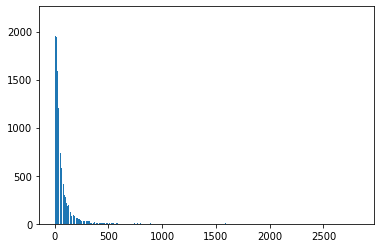

In [254]:
plt.bar( word_counts_per_review.keys(), word_counts_per_review.values())

In [257]:
maxlen = 150

In [258]:
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
x_train = data[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]

Shape of data tensor: (115864, 150)


In [260]:
# Prepare labels 
labels = np.asarray(one_hot_train_labels)
print('Shape of label tensor:', labels.shape)
labels = labels[indices]
y_train = labels[:training_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of label tensor: (115864,)


In [261]:
tb_collback = keras.callbacks.TensorBoard(log_dir = 'logs_classification', histogram_freq= 1)
early_sp_cb= keras.callbacks.EarlyStopping(monitor='acc', min_delta=0.01, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
callbacks = [tb_collback, early_sp_cb]
#callbacks = []

In [262]:
from tensorboard.plugins import projector

In [263]:
weights = tf.Variable(model.layers[0].get_weights()[0][1:])


In [267]:
from tensorflow.keras.layers import LSTM
embedding_dim = 16
model = Sequential()
embedding = Embedding(max_words, embedding_dim)
#embedding.trainable = False
model.add(embedding)
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 16)          480000    
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                6272      
_________________________________________________________________
flatten_17 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 487,361
Trainable params: 487,361
Non-trainable params: 0
_________________________________________________________________


In [265]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [266]:
y_train.shape

(100000,)

In [268]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs= 10,
batch_size=128,
validation_data=(x_val, y_val), callbacks= callbacks)

Train on 100000 samples, validate on 10000 samples
Epoch 1/10
100000/100000 [==============================] - 66s 663us/sample - loss: 0.3630 - acc: 0.8479 - val_loss: 0.3087 - val_acc: 0.8724
Epoch 2/10
100000/100000 [==============================] - 63s 631us/sample - loss: 0.2992 - acc: 0.8784 - val_loss: 0.3086 - val_acc: 0.8777
Epoch 3/10
100000/100000 [==============================] - 63s 633us/sample - loss: 0.2881 - acc: 0.8819 - val_loss: 0.3031 - val_acc: 0.8780
Epoch 4/10
100000/100000 [==============================] - 63s 629us/sample - loss: 0.2814 - acc: 0.8845 - val_loss: 0.3010 - val_acc: 0.8785
Epoch 5/10
100000/100000 [==============================] - 63s 626us/sample - loss: 0.2749 - acc: 0.8878 - val_loss: 0.3228 - val_acc: 0.8582


In [243]:
log_dir='logs/log_basic'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)



with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for subwords in tokenizer.index_word.values():
        f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown"
    for unknown in range(1, tokenizer.num_words - len(tokenizer.index_word.values())):
        f.write("unknown #{}\n".format(unknown))

In [244]:
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [245]:
weights

<tf.Variable 'Variable:0' shape=(9999, 16) dtype=float32, numpy=
array([[ 0.25812215, -0.14964451,  0.26102448, ...,  0.22555596,
         0.23032278, -0.34558213],
       [ 0.11329032, -0.11564521,  0.23242342, ...,  0.3344264 ,
         0.256285  , -0.37440026],
       [ 0.23576875, -0.1258989 ,  0.127261  , ...,  0.20367612,
         0.18914232, -0.3408798 ],
       ...,
       [ 0.08185254, -0.04736368,  0.10690936, ...,  0.05569739,
         0.07249822, -0.12456163],
       [ 0.10892569, -0.02016728,  0.12468413, ...,  0.16177642,
         0.13899273, -0.13960642],
       [ 0.04803655, -0.07464578,  0.11843015, ...,  0.08224957,
         0.13150647, -0.13247772]], dtype=float32)>

#predictions = model.predict(test_data)

In [246]:
import os
PATH = os.getenv('PATH')
%env PATH=/Users/pankaj/anaconda/envs/nlp/bin:$PATH
    
%load_ext tensorboard
%tensorboard --logdir logs/log_basic


env: PATH=/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/condabin:/Users/pankaj/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6011 (pid 50348), started 0:15:26 ago. (Use '!kill 50348' to kill it.)

In [269]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6012: logdir my_log_dir (started 1:33:40 ago; pid 23210)
  - port 6011: logdir logs/log_basic (started 0:47:18 ago; pid 50348)


In [270]:
notebook.display( height=1000) 


Selecting TensorBoard with logdir logs/log_basic (started 0:47:43 ago; port 6011, pid 50348).
